In [2]:
# Some useful libraries
import numpy as np

#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
# import seaborn as sns
import matplotlib.pyplot as plt

#for nice vector graphics
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

/var/folders/41/45m74w_168x_6pyz13xnmwg80000gp/T/ipykernel_17350/1581850865.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


## Problem 1

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

(a)  Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point,and plot the histogram of 
    the resulting 1000 points.  What do you observe?

(b)  Estimate the mean and the variance of the sum.

Mean: -0.19934725454460242
Variance: 50.95774544644929


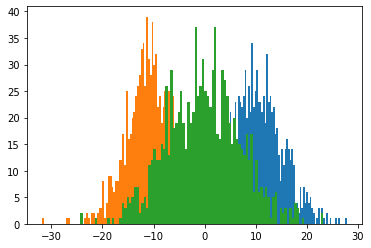

In [10]:
mu, sigma = 10, 5

#1000 samples from N(10, 5) distribution
sampleA = np.random.normal(mu, sigma, 1000);

#1000 samples from N(-10, 5) distribution
sampleB = np.random.normal(-mu, sigma, 1000);

#element wise sum of the two sets of samples
sumMatrix = np.add(sampleA, sampleB) 

#Plot each of the sets of samples as histograms
plt.hist(sampleA, 100) #orange
plt.hist(sampleB, 100) #blue
plt.hist(sumMatrix, 100) #green

#Mean and Variance of the summed set
print("Mean:", np.mean(sumMatrix))
print("Variance:", np.var(sumMatrix))

a) The mean of the summed set of samples is pretty close to 0. Since the expected value of a Normal distribution is the mean,
the expected value (or mean) of the summed set will be 

$\mathbb{E}[A+B]=\mathbb{E}[A]+\mathbb{E}[B] = 10 + -10 = 0$. 

Similarily, when two distributions of INDEPENDENT random variables are summed, the variances are also added up.

$Var(X+Y)=Var(X)+Var(Y)$. 

Since $Var(A) = \sigma_{a}^2$, the new variance will be 

$Var(A+B)=\sigma_{a}^2+\sigma_{b}^2 = 5^2 + 5^2 = 50$. 

b) Since these samples are pulled randomely from the distributions, the mean and variances won't be exactly 0 and 50 (respectively), but as the number of samples increases they will approach these true values. 

## Problem 2

**Central Limit Theorem.**  

Let $X_{i}$ be an iid Bernoulli random variable with value {-1,1}. Look at the random variable $$Z_{n}=\frac{1}{n}∑X_{i}$$ By taking 1000 draws from $Z_{n}$, plot its histogram. Check that for small n (say, 5-10) $Z_{n}$ does not look that much like a Gaussian, but when n is bigger (already by the time n= 30 or 50) it looks much more like a Gaussian.  Check also for much bigger n: n= 250, to see that at this point, one can really see the bell curve.

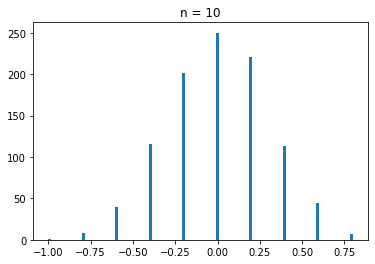

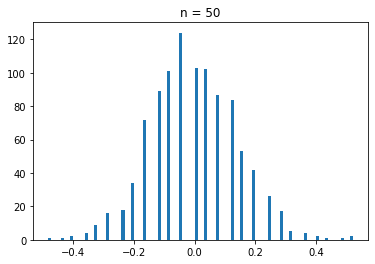

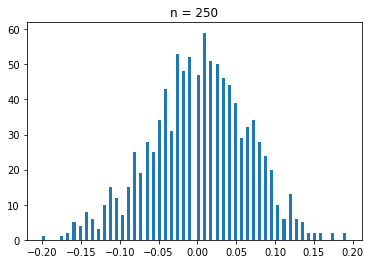

In [11]:
def plotBernoulliSum(n):
    data = []
    #take 1000 samples from Zn
    for x in range(0, 1000):
        sampleSum = 0
        #create one sample of Zn by summing n Binomial samples 
        # to create one Bernoulli sample
        for y in range(0, n):
            #sample from Binomial distribution and adjust values 
            # to match the {-1, 1} set
            sample = np.random.binomial(1, 0.5)
            if sample == 0:
                sample -= 1
            sampleSum += sample
        sampleSum /= float(n)
        #add sample to data set
        data.append(sampleSum)
    #display data with n
    plt.title("n = %d" % n)
    plt.hist(data, 100)
    plt.show()
    
#Create plots for each value of n
plotBernoulliSum(10)
plotBernoulliSum(50)
plotBernoulliSum(250)

As can be seen, for fewer samples drawn the random variable $Z_{n}$ appears more triangular. While there may be more values of $Z_{n}$ that tend to be closer to 0, it doesn't follow the typical Gaussian curve. As n gets much larger, we can see the Gaussian curve with very few extreme values and a much smaller variance as well.

## Problem 3

Estimate the mean and standard deviation from 1 dimensional data:  generate 25,000 samplesfrom a Gaussian distribution with mean 0 and standard deviation 5.  Then estimate the meanand standard deviation of this gaussian using elementary numpy commands,  i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [12]:
mu, sigma, samples = 0, 5, 25000

# 25000 samples from Normal distribution 
# with standard deviation of 5 and mean 0
data = np.random.normal(mu, sigma, samples); 
#compute the mean of the data
mean = np.sum(data) / samples

#compute variance of the data
variance = np.sum((data - mean)**2)
variance /= samples

#compute standard deviation from variance of the data
deviation = np.sqrt(variance)

print("Mean: ", mean)
print("Deviation: ", deviation)

Mean:  0.04602114919090054
Deviation:  4.985084731662322


The mean is simply computed by finding the expected value of the data (aka the average). 

$$\mathbb{E}[X] = \frac{1}{N} \sum_{j = 1}^{N}(X_{j}) $$


The deviation is found by first finding the variation of the data and then taking it's square root.

$$Var(X) = \frac{1}{N} \sum_{j = 1}^{N}(X_{j}- \mu_{x})^{2} $$

$$\sigma = \sqrt{Var(X)}$$

## Problem 4

Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution $\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}20 & 0.8\\0.8 & 30\end{array}\right)\biggr)$. Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [7]:
samples = 10000
mu = [-5, 5]
cov = [[20, 0.8], [0.8, 30]]
x, y = np.random.multivariate_normal(mu, cov, samples).T
#10000 samples from bivariate Normal distribution 
#with given mu and covariance matrix

#compute means
meanX = np.sum(x) / samples
meanY = np.sum(y) / samples

mean = [meanX, meanY]

#compute the variance as before and the covariance 
#using the equation for computing covariance
varX = np.sum((x - meanX)**2) / samples
varY = np.sum((y - meanY)**2) / samples

#compute covariance between x and y, as n increases this should approach 0.8
cov = np.sum((x - meanX)*(y - meanY)) / (samples - 1)

covMatrix = np.array([[varX, cov], [cov, varY]])

#print out the mean and covariance matrix
print("Mean:\n", mean, "\n")
print("Covariance:\n", covMatrix )

Mean:
 [-4.989619574119173, 5.002811353300056] 

Covariance:
 [[20.38452929  1.33934474]
 [ 1.33934474 29.98489282]]


We can find the mean and variance as before (albeit with 2 dimensions instead of 1). To find the covariance though between two random variables, we use the following equation.

$$Cov(X, Y) = \frac{1}{N-1} \sum_{j = 1}^{N}(X_{j}- \mu_{x})*(Y_{j}- \mu_{y}) $$

## Problem 5

Download from Canvas/Files the datasetPatientData.csv. Each row is a patient and the last column is the condition that the patient has.  Do data exploration using Pandas and other visualization tools to understand what you can about the data set. For example:

(a)  How many patients and how many features are there?

(b)  What is the meaning of the first 4 features?  See if you can understand what they mean.

(c)  Are there missing values?  Replace them with the average of the corresponding feature column

(d)  How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.

Features:  279
Patients:  452


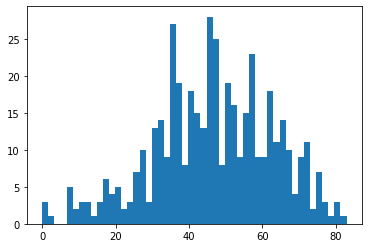

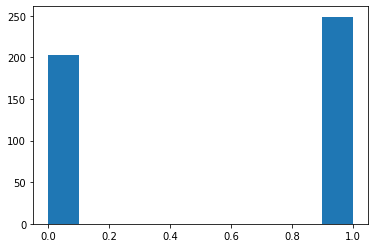

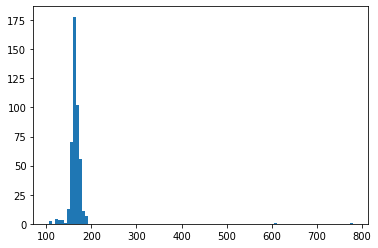

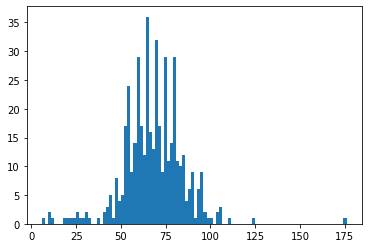

In [9]:
#Read data specifying the data to be float values and missing values to have ?
#no header (names of columns)
data = pd.read_csv('PatientData.csv', header=None, dtype=np.float64, na_values='?')

#Find the number of features and patients
features = len(data.iloc[0])-1 #Subtract one because last column is output
patients = len(data) 
print("Features: ", features) 
print("Patients: ", patients)

#Replace any missing values with the mean of the columns/features
newData = data.fillna(data.mean())

plt.hist(data.T.iloc[0], bins=50)
plt.show()
plt.hist(data.T.iloc[1], bins=10)
plt.show()
plt.hist(data.T.iloc[2], bins=100)
plt.show()
plt.hist(data.T.iloc[3], bins=100)
plt.show()


#Write the new data back to a new file
newData.to_csv('PatientDataFixed.csv')

a) There 279 features (+ condition feature) and 452 patients (aka samples).

b) With these being medical records and the first column being in the range of 0 to 80, it can be assumed that this first feature is very likely the age of the patient. The second feature is binary and pretty evenly ditributed so it's most likely gender. The third and fourth features are more difficult to ascertain without being given forknowledge, but reasonable guesses could be blood pressure and heart rate.

c) There are several missing values specified as being "?" in the data. They can be filled in with one line of code using pandas as seen above.

d)  There are various ways to determine feature importance and this is an active area of machine learning study. Possible ways to determine importance include using decision trees (e.g. xgboost feature selection), f scores, pca/lda (largest eigenvalue eigenvectors), highest correlation with output variable, standardized regression coefficients, change in R^2/other metrics as variable is added to rest of variables, and others. Depending on which methods you use, you can determine that different features are most important. At the end of the day, the goal is to predict the output variable while minimizing (or maximizing) some metric, so pick all or some features that help with this.

## Written Questions

## Problem 1

Consider two random variables X,Y that are not independent. Their probabilities of are given
by the following table:

|X=0 | X=1
---|---|---
Y=0 | 1/4 | 1/4
Y=1 | 1/6 | 1/3

(a) What is the probability that $X = 1$?

(b) What is the probability that $X = 1$ conditioned on $Y = 1$?

(c) What is the variance of the random variable $X$?

(d) What is the variance of the random variable $X$ conditioned that $Y = 1$?

(e) What is $\mathbb{E}[X^3 + X^2 + 3 Y^7|Y = 1]$?


a) $\mathbb{P}(X = 1) = \mathbb{P}(X = 1 \cap Y = 1) + \mathbb{P}(X = 1 \cap Y = 0) = \frac{1}{4} + \frac{1}{3} = \frac{7}{12}$

This is true by the Total Probability Theorem.

$\mathbb{P}(X = x) = \sum_{y \in Y}\mathbb{P}(X = x \cap Y = y)$

b) $\mathbb{P}(X = 1| Y = 1) = \frac{\mathbb{P}(X = 1 \cap Y = 1)}{\mathbb{P}(Y = 1)} = \frac{\frac{1}{3}}{\frac{1}{6} + \frac{1}{3}} = \frac{2}{3}$

This is true by Bayes Theorem.

$\mathbb{P}(X = x|Y=y) = \frac{\mathbb{P}(X = x \cap Y = y)}{\mathbb{P}(Y = y)}$


c) $\mathbb{E}[X] = \sum_{x \in X}x\mathbb{P}(X=x) = 1*P(X=1) + 0*P(X=0) = 1*\frac{7}{12} = \frac{7}{12}$

$Var(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = \sum_{x \in X}(x - \frac{7}{12})^2\mathbb{P}(X=x) = (1-\frac{7}{12})^2*\frac{7}{12} + (0-\frac{7}{12})^2*\frac{5}{12} = \frac{35}{144}$

d) $\mathbb{E}[X|Y=1] = \sum_{x \in X}x\mathbb{P}(X=x|Y=1) = 1*P(X=1|Y=1) + 0*P(X=0|Y=1) = 1*\frac{2}{3} = \frac{2}{3}$

$Var(X|Y=1) = \mathbb{E}[(X - \mathbb{E}[X|Y=1])^2|Y=1] = \sum_{x \in X}(x - \frac{2}{3})^2\mathbb{P}(X=x|Y=1) = (1-\frac{2}{3})^2*\frac{2}{3} + (0-\frac{2}{3})^2*\frac{1}{3} = \frac{2}{9}$

e)  $\mathbb{E}[X^3 + X^2 + 3 Y^7|Y = 1] = \mathbb{E}[X^3|Y = 1] + \mathbb{E}[X^2|Y = 1] + 3\mathbb{E}[Y^7|Y = 1] = \sum_{x \in X}x^3\mathbb{P}(X=x|Y=1) + \sum_{x \in X}x^2\mathbb{P}(X=x|Y=1) + 3$

$= 1^3*\mathbb{P}(X=1|Y=1) + 0 + 1^2*\mathbb{P}(X=1|Y=1) + 0 + 1 = 2*\mathbb{P}(X=1|Y=1) + 1 = 2*\frac{2}{3} + 3 = \frac{13}{3}$

Note that $\mathbb{E}[Y^7|Y = y] = y$. You can derive this yourself.

## Problem 2

Consider the vectors $v_1$ = [1, 1, 1] and $v_2$ = [1, 0, 0]. These two vectors define a 2-dimensional
subspace of $\mathbb{R}^3$. Project the points P1 = [3, 3, 3], P2 = [1, 2, 3], P3 = [0, 0, 1] on this subspace.
Write down the coordinates of the three projected points. (You can use numpy or a calculator
to do arithmetic if you want).


Let $<a, b>$ be the dot product of a and b. Let $V = span\{v_1, v_2\}$ and $V_{\perp}$ the orthogonal complement. 

Then $P_i = y_V + y_{V_{\perp}}$ where $y_V \in V$ is the projection in $V$ we are looking for and $y_{V_{\perp}} \in V_{\perp}$

One way to solve this problem is by calculating $y_V$ directly by projecting on 2 orthogonal vectors that span $V$:

If you want to project a vector onto a subspace, you need to find the basis of that subspace first. This constists of finding n orthogonal vectors ($<v_i, v_j> = 0$) which together span all of $\mathbb{R}^n$. In our case, we are spanning $\mathbb{R}^2$ so we need 2 orthogonal vectors.

Take $w_2 = v_2 = [1, 0 ,0]$ as your first vector (since it's easier to work with), and let $w_1 = v_1-Proj_{w_2} v_1 = v_1-\frac{<w_2, v_1>}{<v_1, v_1>}v_1= [1,1,1]-[1,0,0]=[0,1,1]$ as the second vector, which is orthogonal to $v_2$. Then $V=span\{w_1, w_2\}$


P1 projected on $V$ = $\frac{<P1, w_1>}{<w_1, w_1>}w_1 + \frac{<P1, w_2>}{<w_2, w_2>}w_2 = \frac{6}{2}w_1 + \frac{3}{1}w_2 = [0, 3, 3] + [3, 0, 0] = [3, 3, 3]$. 


P2 projected on $V$ = $\frac{<P2, w_1>}{<w_1, w_1>}w_1 + \frac{<P2, w_2>}{<w_2, w_2>}w_2 = \frac{5}{2}w_1 + \frac{1}{1}w_2 = [0, 5/2, 5/2] + [1, 0, 0] = [1, 5/2, 5/2]$

P3 projected on $V$ = $\frac{<P3, w_1>}{<w_1, w_1>}w_1 + \frac{<P3, w_2>}{<w_2, w_2>}w_2 = \frac{1}{2}w_1 + \frac{0}{1}w_2 = [0, \frac{1}{2}, \frac{1}{2}] + [0, 0, 0] = [0, \frac{1}{2}, \frac{1}{2}]$. 


A second approach would be to find the projection $y_{V_{\perp}}$ of $P_i$ over $V_{\perp} = span(N)$ (where $N$ is the normal vector to $V$, you can calculate it using the Cross product). And then you know that $y_V = P_i  - y_{V_{\perp}}$. 

## Problem 3

Consider a coin such that probability of heads is $\frac{2}{3}$.  Suppose you toss the coin 100 times.Estimate the probability of getting 50 or fewer heads.  You can do this in a variety of ways.One way is to use the Central Limit Theorem.  Be explicit in your calculations and tell uswhat tools you are using in these.

Let $$X_{i}\sim Bernoulli(\frac{2}{3})$$ where $X_{i}$ are iid. The question essentially asks you to compute: 
$$\mathbb{P}(S_{n} \leq 50 )$$ where $$S_{n} = \sum_{i = 1}^{100} X_{i}$$ Let $\mu_{n} = \mathbb{E}[S_{n}]$ and $\sigma_{n} = \sqrt{Var(S_{n})} $. So, the question can be rewritten as: $$\mathbb{P}(Z_{n} \leq \frac{50 - n\mu_{n}}{\sigma_{n}\sqrt{n}})$$ where $Z_{n} = \frac {S_{n} - n\mu_{n}}{\sigma_{n}\sqrt{n}}$. CLT tells us that as $n\to\infty$, $Z_{n}$ approaches the standard normal distribution. Therefore the solution is approximately $\Phi(z)$ where $z = \frac{50 - n\mu_{n}}{\sigma_{n}\sqrt{n}}$, which is simply the tail probability of the standard normal distribution (on most standard scientific calculators). Using $\mu_{n} = p$ and $\sigma_{n} = p(1-p)$, you can calculate this value.

Solution: ~0.0203%